In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator
from sympy import *
#from sympy.physics.quantum.dagger import Dagger
#init_printing(use_latex='mathjax')

Seja o potencial da forma

$$ V(r)= D \left[ 1 - e^{-a(r - r_e)} \right]^2$$

com $D$, $r_e$ e $a$ parâmetros constantes e reais, enquanto $r$ representa a distancia de um objeto físico à origem do potencial. Podemos defini-lo simbolicamente dentro do python como:

In [17]:
D = symbols('D',real=True)
a = symbols('a',real=True)
r_e = symbols('r_e',real=True)
r = symbols('r', positive=True)


V= D*(1 - exp(-a*(r - r_e)))**2

display(V)

D*(1 - exp(-a*(r - r_e)))**2

O mesmo pode ser presentado gráficamente como:

Text(0, 0.5, '$V(D)$')

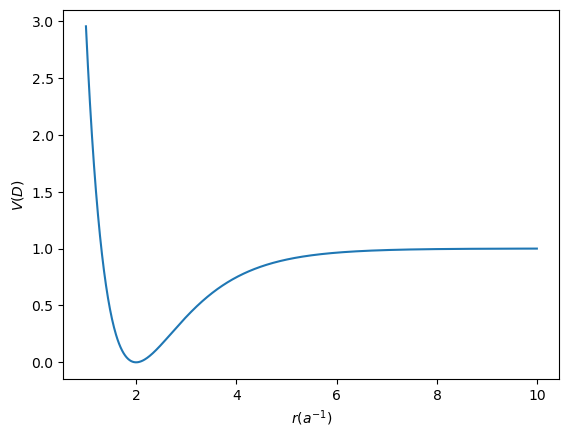

In [29]:
fig, ax = plt.subplots()
x = np.arange(1, 10, 0.01)
f1 = lambdify(r, V.subs(D,1).subs(r_e,2).subs(a,1), "numpy") #Aqui traduz-se uma função do sympy para o numpy, substituindo alguns valores
y=f1(x)

ax.plot(x, y)
plt.xlabel(r"$r(a^{-1})$")
plt.ylabel(r"$V(D)$")


Vamos encontrar simbólicamente o mínimo deste potencial. Primeiramente encontrando a derivada primeira do potencial:
$$ \frac{d V(r)}{dr} $$

In [19]:
dV1 = diff(V, r)
display(Eq(dV1,0))

Eq(2*D*a*(1 - exp(-a*(r - r_e)))*exp(-a*(r - r_e)), 0)

O mínimo ocorre quando a derivada primeira é zero. Ou seja

In [24]:
solve(dV1,r)[0]

r_e

Como $r$ só pode assumir valores positivos e reais (ja que é uma posição), então temos apenas uma solução:

In [25]:
r0=solve(dV1,r)[0]
display(r0)

r_e

Podemos agora calcular a derivada segunda exatamente no ponto de mínimo e encontrar a expressão para a constante elástica deste potencial
$$ k = \frac{d^2V(r_0)}{dr^2} $$

In [26]:
dV2 = diff(dV1, r)
display(dV2.subs(r,r0))

2*D*a**2